# Maladies cardiovasculaires
## Crise cardiaque et statistical learning
<a href="https://www.kaggle.com/yassinehamdaoui1/cardiovascular-disease?select=cardiovascular.txt">Dataset kaggle : Cardiovascular Disease</a>

### Importation des librairies

In [91]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sea
import math
import scipy

### Importation du dataset

In [6]:
data = pd.read_csv("cardiovascular.txt",sep=';',decimal=',')

#### Exploration du dataset

In [8]:
data.head(10)

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [9]:
data.tail(10)

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
452,454,154,5.53,3.20,28.81,Present,61,26.15,42.79,42,0
453,455,124,1.60,7.22,39.68,Present,36,31.50,0.00,51,1
454,456,146,0.64,4.82,28.02,Absent,60,28.11,8.23,39,1
455,457,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27,1
456,458,170,0.40,4.11,42.06,Present,56,33.10,2.06,57,0
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.00,4.82,33.41,Present,62,14.70,0.00,46,1


In [10]:
data.shape

(462, 11)

Le dataset est omposé de 462 observations sur 10 variables de suivi.<br/>
Les 10 variables de suivi sont :<br/>
- ```sbp``` : pression sanguine systolique, variable numérique
- ```tobacco``` : la consommation cumulée de tabac (en kg), variable numérique
- ```ldl``` : le taux de cholesterol LDL, variable numérique
- ```adiposity``` : adiposité, variable numérique
- ```famhist``` : l'historique familial de maladie cardiaque, variable catégorielle
- ```typea``` : adéquation au comportement de type A, variable numérique
- ```obesity``` : obésité, variable numérique
- ```alcohol``` : consomation d'alcool, variable numérique
- ```age``` : âge à l'entrée
- ```chd``` : REPONSE, maladie cardio vasculaire, variable catégorielle

La variable ```famhist``` doit être réencodée au format 1/0 afin de pouvoir être étudiée dans les modèles.

In [11]:
data.index=data.iloc[:,0]
data_numeric=data.iloc[:,1:]

data_numeric=data_numeric.drop(['chd','famhist'],axis=1)

Les variables numériques sont extraites afin de pouvoir effectuer des analyses descriptives.

In [12]:
data_numeric.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
ind,,,,,,,,
1,160,12.00,5.73,23.11,49,25.30,97.20,52
2,144,0.01,4.41,28.61,55,28.87,2.06,63
3,118,0.08,3.48,32.28,52,29.14,3.81,46
4,170,7.50,6.41,38.03,51,31.99,24.26,58
5,134,13.60,3.50,27.78,60,25.99,57.34,49


In [13]:
data_numeric.tail()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
ind,,,,,,,,
459,214,0.40,5.98,31.72,64,28.45,0.00,58
460,182,4.20,4.41,32.10,52,28.61,18.72,52
461,108,3.00,1.59,15.23,40,20.09,26.64,55
462,118,5.40,11.61,30.79,64,27.35,23.97,40
463,132,0.00,4.82,33.41,62,14.70,0.00,46


In [15]:
data_numeric.dtypes

sbp           int64
tobacco      object
ldl          object
adiposity    object
typea         int64
obesity      object
alcohol      object
age           int64
dtype: object

Les variables de type ```object``` sont à convertir. Toutes les variables sont converties en ```float64```.

In [17]:
data_numeric=data_numeric.astype('float')
data_numeric.dtypes

sbp          float64
tobacco      float64
ldl          float64
adiposity    float64
typea        float64
obesity      float64
alcohol      float64
age          float64
dtype: object

In [18]:
data_numeric.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

Il n'y a pas de valeurs manquantes dans le dataset.

In [19]:
data_numeric.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


Ce tableau présente les moyennes, ecarts-type, minimum, quartiles et maximum pour chaque variable numérique étudiée.

#### Distribution des variables d'intérêt

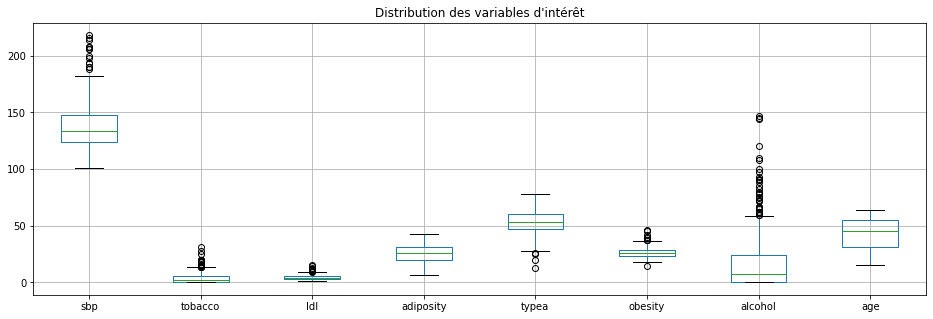

In [101]:
plt.figure(figsize=(16,5))
data_numeric.boxplot()
plt.title("Distribution des variables d'intérêt")
plt.show()

Afin d'étudier les variables catégorielle, il faut en faire une représentation graphique.

In [20]:
data.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [24]:
data.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

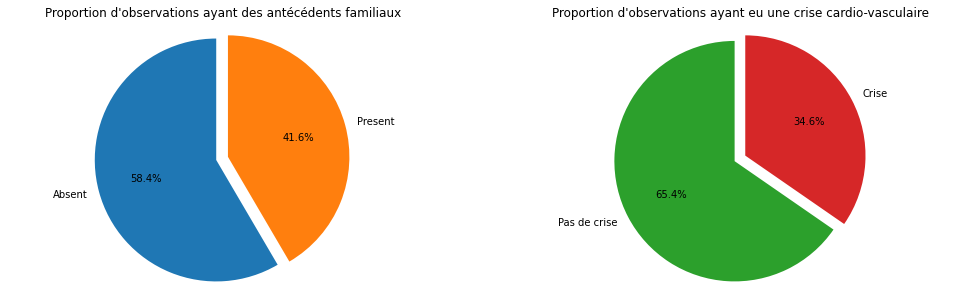

In [59]:
famhist_proportion=data.famhist.value_counts()/data.famhist.value_counts().sum()
chd_proportion=data.chd.value_counts()/data.chd.value_counts().sum()

fig =plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(x=famhist_proportion, explode=(0,0.1), labels=['Absent','Present'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title("Proportion d'observations ayant des antécédents familiaux")

ax2 = fig.add_subplot(1,2,2)
ax2.pie(x=chd_proportion, explode=(0,0.1), labels=['Pas de crise','Crise'], autopct='%1.1f%%', startangle=90,
        colors=('tab:green','tab:red'))
ax2.axis('equal')
ax2.set_title("Proportion d'observations ayant eu une crise cardio-vasculaire")

plt.show()

#### Matrice des corrélations entre les variables d'intérêt

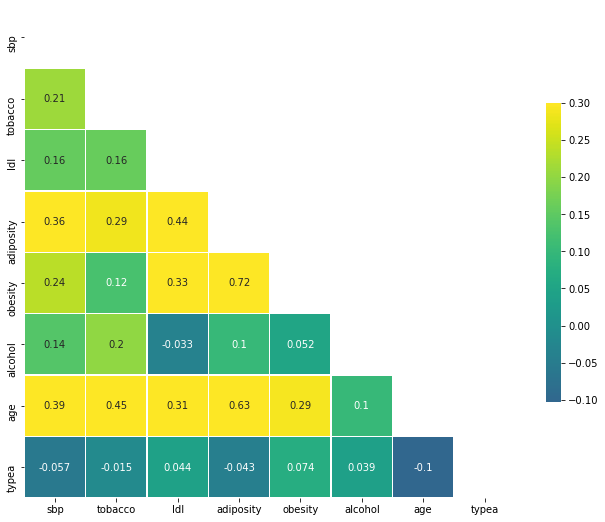

In [79]:
data_corr=pd.DataFrame(data_numeric,columns=['sbp', 'tobacco', 'ldl', 'adiposity','obesity','alcohol', 'age','typea'])

corr=data_corr.corr()
corr_map=sea.color_palette("viridis",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, mask=mask, cmap=corr_map, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [102]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

       sbp  tobacco    ldl  adiposity  typea  obesity  alcohol   age
ind                                                                 
1    160.0    12.00   5.73      23.11   49.0    25.30    97.20  52.0
2    144.0     0.01   4.41      28.61   55.0    28.87     2.06  63.0
3    118.0     0.08   3.48      32.28   52.0    29.14     3.81  46.0
4    170.0     7.50   6.41      38.03   51.0    31.99    24.26  58.0
5    134.0    13.60   3.50      27.78   60.0    25.99    57.34  49.0
..     ...      ...    ...        ...    ...      ...      ...   ...
459  214.0     0.40   5.98      31.72   64.0    28.45     0.00  58.0
460  182.0     4.20   4.41      32.10   52.0    28.61    18.72  52.0
461  108.0     3.00   1.59      15.23   40.0    20.09    26.64  55.0
462  118.0     5.40  11.61      30.79   64.0    27.35    23.97  40.0
463  132.0     0.00   4.82      33.41   62.0    14.70     0.00  46.0

[462 rows x 8 columns]
Axis: 1 ; Eigen value: 644.75; Proportion 45.00
Axis: 2 ; Eigen value: 448.65; 

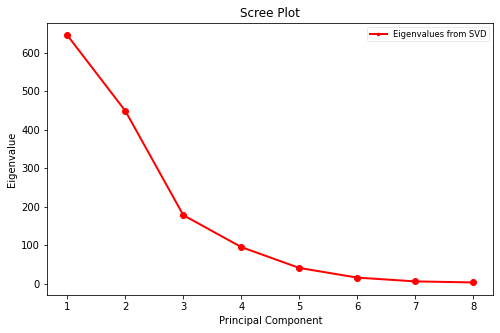

In [123]:
print(data_numeric)
pca = PCA()
pca.fit(data_numeric)

i=1
for eigen in pca.explained_variance_ :
    print ("Axis: {} ; Eigen value: {:.2f}; Proportion {:.2f}".format(i,eigen,eigen/sum(pca.explained_variance_)*100))
    i+=1

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(pca.explained_variance_.shape[0]) + 1
plt.plot(sing_vals, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=mat.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

### Standardisation des données

Afin de pouvoir effectuer une ACP il faut standardiser les données.

In [124]:
data_std=StandardScaler().fit_transform(data_numeric)

data_std=pd.DataFrame(data_std,columns=['sbp', 'tobacco', 'ldl', 'adiposity','obesity','alcohol', 'age','typea'])

data_std.index=data.index

          sbp   tobacco       ldl  adiposity   obesity   alcohol       age  \
ind                                                                          
1    1.058564  1.823073  0.478412  -0.295503 -0.418470 -0.176786  3.277738   
2    0.277089 -0.790237 -0.159680   0.412140  0.193344  0.671373 -0.612745   
3   -0.992806 -0.774980 -0.609245   0.884332 -0.112563  0.735519 -0.541183   
4    1.546985  0.842264  0.807126   1.624141 -0.214532  1.412621  0.295062   
5   -0.211332  2.171805 -0.599577   0.305351  0.703189 -0.012856  1.647775   
..        ...       ...       ...        ...       ...       ...       ...   
459  3.696039 -0.705234  0.599263   0.812281  1.111065  0.571590 -0.696983   
460  2.133091  0.123004 -0.159680   0.861173 -0.112563  0.609602  0.068519   
461 -1.481228 -0.138545 -1.522877  -1.309364 -1.336191 -1.414575  0.392385   
462 -0.992806  0.384553  3.320823   0.692625  1.111065  0.310252  0.283203   
463 -0.309016 -0.792417  0.038515   1.029720  0.907127 -2.695129

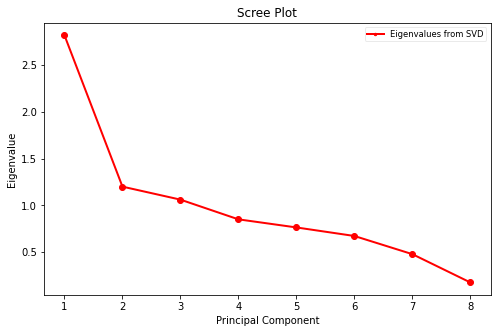

In [125]:
print(data_std)
pca = PCA()
pca.fit(data_std)

i=1
for eigen in pca.explained_variance_ :
    print ("Axis: {} ; Eigen value: {:.2f}; Proportion {:.2f}".format(i,eigen,eigen/sum(pca.explained_variance_)*100))
    i+=1

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(pca.explained_variance_.shape[0]) + 1
plt.plot(sing_vals, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=mat.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

On a **2 composantes principales**.

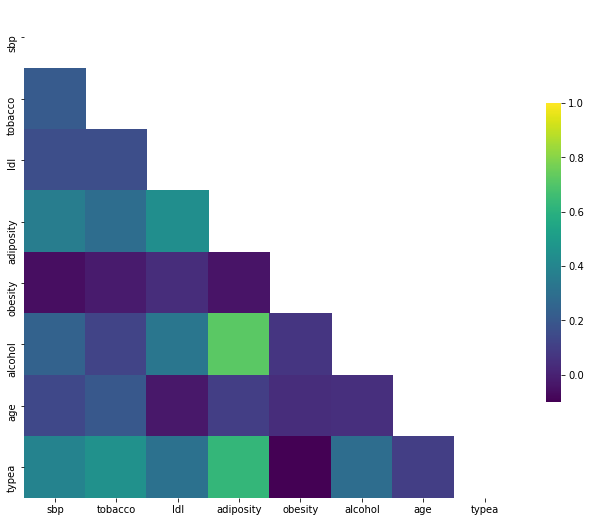

In [135]:
data_corr=pd.DataFrame(data_std,columns=['sbp', 'tobacco', 'ldl', 'adiposity','obesity','alcohol', 'age','typea'])

corr=round(data_corr.corr(),ndigits=3)
corr_map=sea.color_palette("viridis",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(round(corr,ndigits=2),mask=mask, cmap=corr_map, vmax=1,
            square=True, cbar_kws={"shrink": .5})
plt.show()

## Analyse PCA

In [137]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

On récupère les colonnes ```famhist```et ```chd```pour l'analyse.

In [126]:
data_PCA=pd.concat([data_std,data.famhist,data.chd],axis=1)
data_PCA.head()

,sbp,tobacco,ldl,adiposity,obesity,alcohol,age,typea,famhist,chd
ind,,,,,,,,,,
1,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,Present,1
2,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,Absent,1
3,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,Present,0
4,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,Present,1
5,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,Present,1


Création des tables d'entrainement et de test

In [176]:
X=data_std.iloc[:,:-1]
y = data_PCA['chd']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) 
print(X_train.shape,X_test.shape)

(323, 7) (139, 7)


In [177]:
pca=PCA(n_components=5)

principalComponents = pca.fit_transform(X_train)

factors_Df = pd.DataFrame(data = principalComponents, columns =['PC1','PC2','PC3','PC4','PC5'])

factors_Df.index=X_train.index

In [178]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5
ind,,,,,
8,-1.603548,-0.463756,0.666029,-0.938702,0.558960
423,-0.462414,0.735279,-1.306275,0.348033,-1.874595
109,-0.883492,-1.062873,0.509054,-0.762363,0.166638
239,-1.142358,-0.759797,0.137558,-0.448987,-0.021111
434,-1.422167,0.086357,-1.499590,0.151642,-0.412492


In [179]:
print('Ratio des valeurs propre: \n',pca.explained_variance_ratio_,)
print('Somme cumulée du ratio des valeurs propres: \n',pca.explained_variance_ratio_.cumsum())
print('Somme du ratio des valeurs propre: \n',pca.explained_variance_ratio_.sum())

Ratio des valeurs propre: 
 [0.33358544 0.16225269 0.14873496 0.1173092  0.1134214 ]
Somme cumulée du ratio des valeurs propres: 
 [0.33358544 0.49583813 0.64457308 0.76188228 0.87530368]
Somme du ratio des valeurs propre: 
 0.8753036816259798


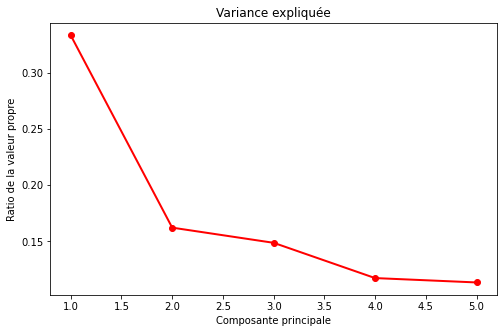

In [185]:
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(pca.explained_variance_ratio_.shape[0]) + 1
plt.plot(sing_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Variance expliquée')
plt.xlabel('Composante principale')
plt.ylabel('Ratio de la valeur propre')
plt.show()

### Projection des observations pour la base d'entrainement

<Figure size 432x288 with 0 Axes>

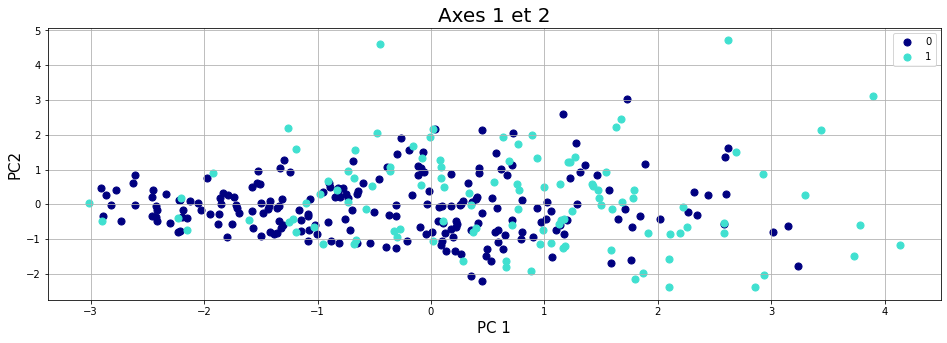

In [205]:
names=pd.DataFrame(data=data.chd,columns=['chd'])

final_factors_Df = pd.concat([factors_Df, data['chd']], axis = 1)
id_factors=pd.concat([names,final_factors_Df],axis=1)
id_factors=id_factors.sort_values(by=['PC1'])
final_factors_Df=final_factors_Df.sort_values(by=['PC1'])


plt.figure()
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
colors = ['navy', 'turquoise']
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Axes 1 et 2', fontsize = 20)
targets = [0,1]

for target, color in zip(targets,colors):
    indicesToKeep = final_factors_Df['chd'] == target
    ax.scatter(final_factors_Df.loc[indicesToKeep, 'PC1'], final_factors_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

### Echantillon Test

In [199]:
X_supp=X_test ; y_supp=y_test
coordSupp=pca.transform(X_supp)

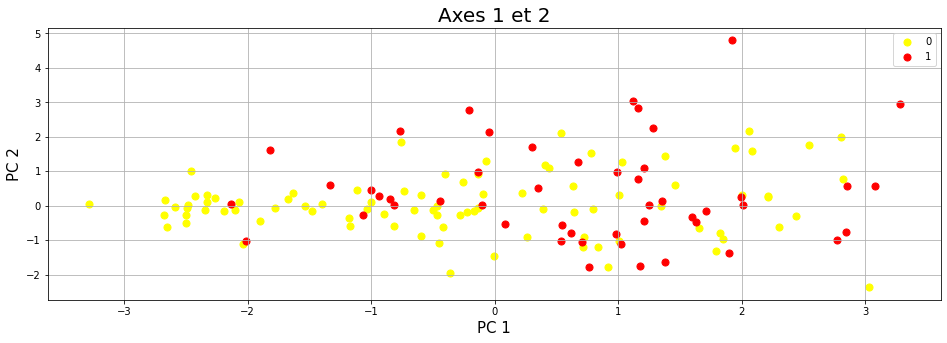

In [206]:
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Axes 1 et 2', fontsize = 20)
df2=pd.DataFrame(data=coordSupp,index=X_supp.index,columns=final_factors_Df.columns[0:5])
df0=data_PCA.loc[X_supp.index]['chd']
gdf=pd.concat([df2,df0],axis=1)
targets = [0,1]
colors = ['yellow','red']
for target, color in zip(targets,colors):
    indicesToKeep = gdf['chd'] == target
    ax.scatter(gdf.loc[indicesToKeep, 'PC1'], gdf.loc[indicesToKeep, 'PC2'],c= color, s = 50,marker='o')
    ax.legend(targets)

ax.grid()
plt.show()